In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create some random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

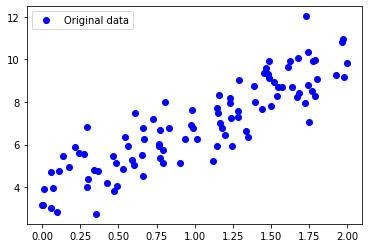

In [3]:
#Visualize Data
plt.plot(X, y, 'ro', label='Original data', color= 'blue')
plt.legend()

In [4]:
#Initialize W and B randomly
W = tf.Variable(initial_value=np.random.randn(), name="weight")
B = tf.Variable(initial_value=np.random.randn(), name="bias")

In [5]:
print(W.numpy(), B.numpy())

-1.5168391 0.9936692


In [6]:
def linear_regression(x):
  #y = w * x + b
  return tf.add(tf.multiply(W, x), B)

In [7]:
def cost(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [8]:
optimizer = tf.optimizers.SGD()

In [9]:
# Optimization process. 
def optimization():
    # GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = cost(pred, y)

    gradients = g.gradient(loss, [W, B])
    
    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, [W, B]))

In [10]:
for epoch in range(1, 2000):
  optimization()
  if epoch % 100 == 0:
    pred = linear_regression(X)
    loss = cost(pred, y)
    print("step: %i, loss: %f, W: %f, b: %f" % (epoch, loss, W.numpy(), B.numpy()))

step: 100, loss: 1.013289, W: 2.683698, b: 4.187576
step: 200, loss: 0.976334, W: 2.836754, b: 4.090480
step: 300, loss: 0.959927, W: 2.918912, b: 3.992714
step: 400, loss: 0.950941, W: 2.979388, b: 3.920087
step: 500, loss: 0.946020, W: 3.024142, b: 3.866335
step: 600, loss: 0.943324, W: 3.057263, b: 3.826552
step: 700, loss: 0.941847, W: 3.081777, b: 3.797110
step: 800, loss: 0.941039, W: 3.099918, b: 3.775321
step: 900, loss: 0.940596, W: 3.113344, b: 3.759194
step: 1000, loss: 0.940353, W: 3.123281, b: 3.747260
step: 1100, loss: 0.940220, W: 3.130635, b: 3.738426
step: 1200, loss: 0.940147, W: 3.136078, b: 3.731890
step: 1300, loss: 0.940108, W: 3.140106, b: 3.727052
step: 1400, loss: 0.940086, W: 3.143088, b: 3.723471
step: 1500, loss: 0.940074, W: 3.145293, b: 3.720821
step: 1600, loss: 0.940067, W: 3.146926, b: 3.718860
step: 1700, loss: 0.940063, W: 3.148134, b: 3.717409
step: 1800, loss: 0.940062, W: 3.149028, b: 3.716336
step: 1900, loss: 0.940060, W: 3.149690, b: 3.715541


**Visualize the fitted line**

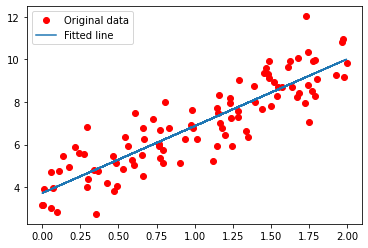

In [11]:
# Graphic display
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + B), label='Fitted line')
plt.legend()
plt.show()